In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False) 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8) 

# Split the data into training and testing sets (already split?)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

In [4]:
# Initializing the models
svm_model = SVC()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Training the models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Defining predictions
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
nb_pred = nb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Defining confusion matrices
svm_cm = confusion_matrix(y_test, svm_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
nb_cm = confusion_matrix(y_test, nb_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

Predicted value: [4]
Real value: 4


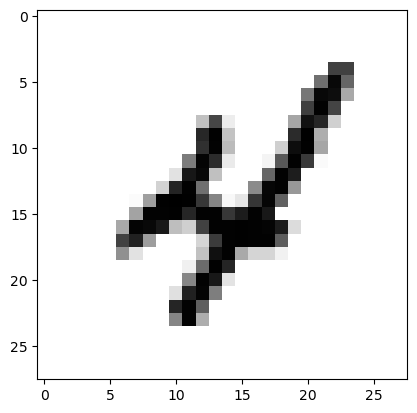

In [5]:
# One exempel of prediction (here with SVM):

print("Predicted value:", svm_model.predict(X[9:10])) # Print predicted value (specified with [x:y], not just [x])

print("Real value:", y[9]) # Print real value

# Display the image
some_digit = X[9]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.show()

In [6]:
# Evaluate the performance by calculating accuracy, precision, recall, and F-measure

svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

svm_precision = precision_score(y_test, svm_pred, average='weighted')
knn_precision = precision_score(y_test, knn_pred, average='weighted')
nb_precision = precision_score(y_test, nb_pred, average='weighted')
dt_precision = precision_score(y_test, dt_pred, average='weighted')
rf_precision = precision_score(y_test, rf_pred, average='weighted')

svm_recall = recall_score(y_test, svm_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')

svm_f1 = f1_score(y_test, svm_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

In [7]:
# Print accuracy, precision, recall, and F1-score for each model

print("Support Vector Machines Accuracy:", svm_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)

print("")

print("Support Vector Machines Precision:", svm_precision)
print("K-Nearest Neighbors Precision:", knn_precision)
print("Naive Bayes Precision:", nb_precision)
print("Decision Tree Precision:", dt_precision)
print("Random Forest Classifier Precision:", rf_precision)

print("")

print("Support Vector Machines Recall:", svm_recall)
print("K-Nearest Neighbors Recall:", knn_recall)
print("Naive Bayes Recall:", nb_recall)
print("Decision Tree Recall:", dt_recall)
print("Random Forest Classifier Recall:", rf_recall)

print("")

print("Support Vector Machines F1-score:", svm_f1)
print("K-Nearest Neighbors F1-score:", knn_f1)
print("Naive Bayes F1-score:", nb_f1)
print("Decision Tree F1-score:", dt_f1)
print("Random Forest Classifier F1-score:", rf_f1)

Support Vector Machines Accuracy: 0.9773
K-Nearest Neighbors Accuracy: 0.9696
Naive Bayes Accuracy: 0.5604
Decision Tree Accuracy: 0.8697
Random Forest Classifier Accuracy: 0.9669

Support Vector Machines Precision: 0.977312712977704
K-Nearest Neighbors Precision: 0.9698482728979723
Naive Bayes Precision: 0.6904678740985059
Decision Tree Precision: 0.8693876426483698
Random Forest Classifier Precision: 0.9669223730284963

Support Vector Machines Recall: 0.9773
K-Nearest Neighbors Recall: 0.9696
Naive Bayes Recall: 0.5604
Decision Tree Recall: 0.8697
Random Forest Classifier Recall: 0.9669

Support Vector Machines F1-score: 0.9772835288959754
K-Nearest Neighbors F1-score: 0.9695265231992276
Naive Bayes F1-score: 0.5187285177389869
Decision Tree F1-score: 0.8694926848428886
Random Forest Classifier F1-score: 0.9668797788047859


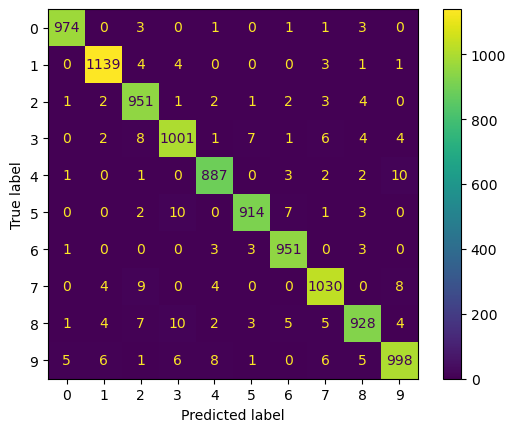

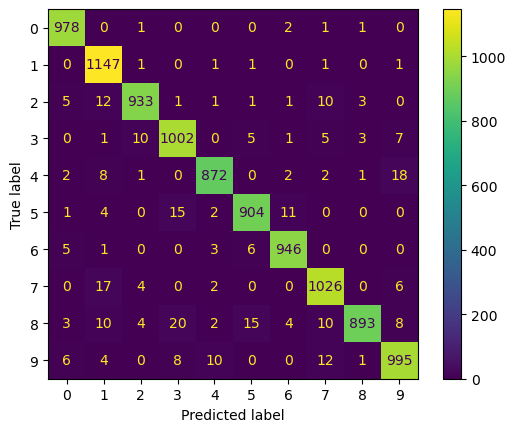

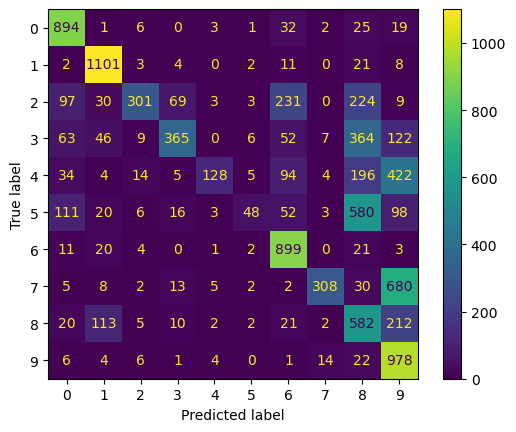

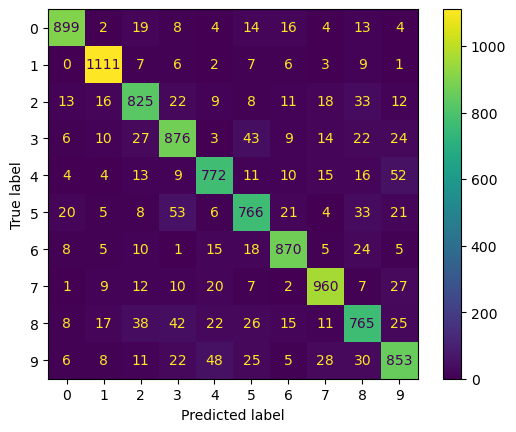

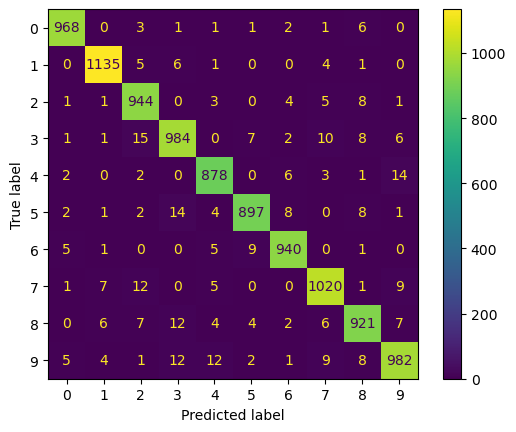

In [8]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

display_confusion_matrix(y_test, svm_pred)
display_confusion_matrix(y_test, knn_pred)
display_confusion_matrix(y_test, nb_pred)
display_confusion_matrix(y_test, dt_pred)
display_confusion_matrix(y_test, rf_pred)

In [9]:
# Find out which true label is most often mistaken for which predicted label, along with the count of misclassifications.

def analyze_misclassifications(cm, title):
    misclassifications = {}
    for true_label in range(10):  # Because there are 10 classes (digits 0 to 9)
        max_misclassification_count = 0
        most_misclassified_digit = None
        for predicted_label in range(10):
            if true_label != predicted_label:  # Exclude correct predictions (diagonal)
                misclassification_count = cm[true_label, predicted_label]
                if misclassification_count > max_misclassification_count:
                    max_misclassification_count = misclassification_count
                    most_misclassified_digit = predicted_label
        misclassifications[true_label] = (most_misclassified_digit, max_misclassification_count)
    
    print(title)
    for true_label, (predicted_label, count) in misclassifications.items():
        print(f"True Label {true_label} is most often misclassified as {predicted_label} ({count} times)")

# print out the most commonly misclassified pairs for each model

analyze_misclassifications(svm_cm, "Support Vector Machines")
analyze_misclassifications(knn_cm, "K-Nearest Neighbors")
analyze_misclassifications(nb_cm, "Naive Bayes")
analyze_misclassifications(dt_cm, "Decision Tree")
analyze_misclassifications(rf_cm, "Random Forest Classifier")

Support Vector Machines
True Label 0 is most often misclassified as 2 (3 times)
True Label 1 is most often misclassified as 2 (4 times)
True Label 2 is most often misclassified as 8 (4 times)
True Label 3 is most often misclassified as 2 (8 times)
True Label 4 is most often misclassified as 9 (10 times)
True Label 5 is most often misclassified as 3 (10 times)
True Label 6 is most often misclassified as 4 (3 times)
True Label 7 is most often misclassified as 2 (9 times)
True Label 8 is most often misclassified as 3 (10 times)
True Label 9 is most often misclassified as 4 (8 times)
K-Nearest Neighbors
True Label 0 is most often misclassified as 6 (2 times)
True Label 1 is most often misclassified as 2 (1 times)
True Label 2 is most often misclassified as 1 (12 times)
True Label 3 is most often misclassified as 2 (10 times)
True Label 4 is most often misclassified as 9 (18 times)
True Label 5 is most often misclassified as 3 (15 times)
True Label 6 is most often misclassified as 5 (6 time